<a href="https://colab.research.google.com/github/Patel-Sujal-18/Myntra-website-Clone/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

os.listdir('/content/drive/MyDrive')


['https:  drive.g.txt',
 'Team Elite - Sujalpatel - SIH-1648.docx',
 'Screenshot_20250121_170612_Gmail (1).jpg',
 'Report (1).gdoc',
 'Untitled document (7).gdoc',
 'Untitled document (6).gdoc',
 'Untitled document (5).gdoc',
 'Untitled document (4).gdoc',
 'Untitled document (3).gdoc',
 'Untitled document (2).gdoc',
 'Jenish Patel Project.docx',
 'COA MID2 .gdoc',
 'Wallpaper (1).jpg',
 'Sujal Patel-5-CE-17.gdoc',
 'Sujal Patel-5-CE-17 (1).docx',
 'Sujal Patel-5-CE-17.docx',
 'Sujal Patel-CE-17-Instagram story.jpg',
 'Untitled document (1).gdoc',
 'Report.gdoc',
 'Untitled form.gform',
 'Suthar Pritul.jpg',
 'Vakharia Dhruv.jpg',
 'Untitled document.gdoc',
 'Vote Of Thanks SIH25.gdoc',
 'i am doing the SE practical 5 and also i provide....gsheet',
 "Copy of E-Summit'25 Payment Details.gsheet",
 '17622781476647045279772156759227.jpg',
 'give the all above information show in the photo.gsheet',
 'Team Pratyasha.pdf',
 'Colab Notebooks',
 'Dateset_image_classification']

In [ ]:
project_path = '/content/drive/MyDrive/Dateset_image_classification'
os.listdir(project_path)


['Training_Dataset', 'Testing_Dataset', 'Car_Bike_model.keras']

In [ ]:
dataset_path = '/content/drive/MyDrive/Dateset_image_classification'

In [ ]:
Car = len(os.listdir(dataset_path + '/Training_Dataset/Car'))
Bike = len(os.listdir(dataset_path + '/Training_Dataset/Bike'))
print("Car :", Car )
print("Bike :", Bike)

Car : 262
Bike : 397


In [ ]:
from PIL import Image
import os

def remove_corrupted_images(folder_path):
    removed = 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()   # check image
        except:
            os.remove(img_path)
            removed += 1
    return removed


In [ ]:
train_car = '/content/drive/MyDrive/Dateset_image_classification/Training_Dataset/Car'
train_bike = '/content/drive/MyDrive/Dateset_image_classification/Testing_Dataset/Bike'

test_car = '/content/drive/MyDrive/Dateset_image_classification/Training_Dataset/Car'
test_bike = '/content/drive/MyDrive/Dateset_image_classification/Testing_Dataset/Bike'

print("Removed from train/car:", remove_corrupted_images(train_car))
print("Removed from train/bike:", remove_corrupted_images(train_bike))
print("Removed from test/car:", remove_corrupted_images(test_car))
print("Removed from test/bike:", remove_corrupted_images(test_bike))


Removed from train/car: 0
Removed from train/bike: 0
Removed from test/car: 0
Removed from test/bike: 0


In [ ]:
print("Train Car:", len(os.listdir(train_car)))
print("Train Bike:", len(os.listdir(train_bike)))
print("Test Car:", len(os.listdir(test_car)))
print("Test Bike:", len(os.listdir(test_bike)))


Train Car: 262
Train Bike: 397
Test Car: 262
Test Bike: 397


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input



In [ ]:
train_dir = '/content/drive/MyDrive/Dateset_image_classification/Training_Dataset'
test_dir  = '/content/drive/MyDrive/Dateset_image_classification/Testing_Dataset'



In [ ]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 659 images belonging to 2 classes.
Found 659 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # pretrained weights lock


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 307s 14s/step - accuracy: 0.7564 - loss: 0.4877 - val_accuracy: 0.9879 - val_loss: 0.1054
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 416ms/step - accuracy: 0.9921 - loss: 0.0795 - val_accuracy: 0.9924 - val_loss: 0.0475
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 411ms/step - accuracy: 0.9924 - loss: 0.0491 - val_accuracy: 0.9939 - val_loss: 0.0340
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 434ms/step - accuracy: 0.9934 - loss: 0.0348 - val_accuracy: 0.9970 - val_loss: 0.0271
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 397ms/step - accuracy: 0.9965 - loss: 0.0262 - val_accuracy: 0.9970 - val_loss: 0.0226


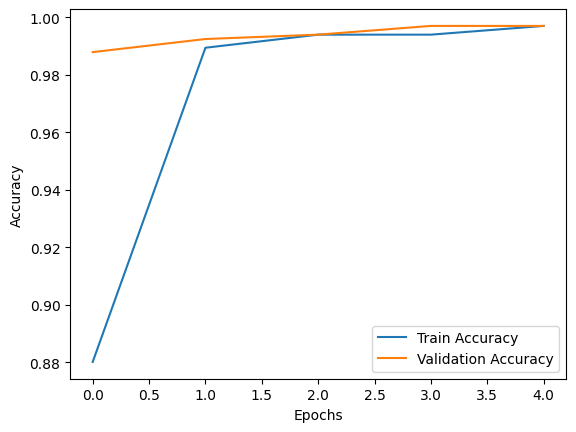

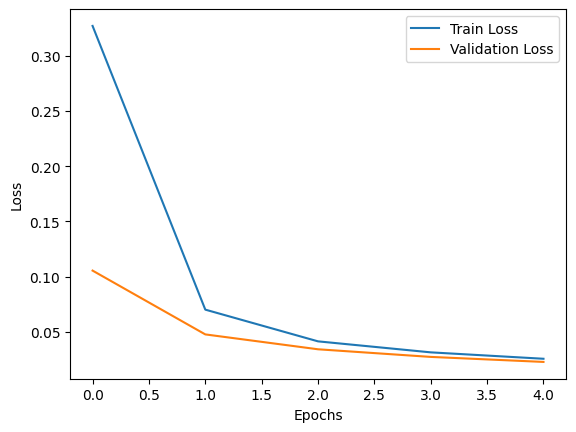

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/Dateset_image_classification/Testing_Dataset/Car/Car (118).jpeg'


In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: Car")
else:
    print("Prediction: Bike")


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Prediction: Car


In [ ]:
model.save('/content/drive/MyDrive/Dateset_image_classification/Car_Bike_model.keras')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

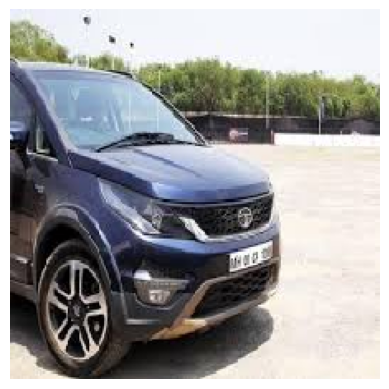

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.axis('off')


In [ ]:
# ====== ALL-IN-ONE SAFE CELL ======
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# image
img_path = "/content/drive/MyDrive/Dateset_image_classification/Testing_Dataset/Car/Car (118).jpeg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# base model & layer
base_model = model.get_layer("mobilenetv2_1.00_224")
gap_layer = model.layers[-2]     # GlobalAveragePooling2D
classifier = model.layers[-1]    # Dense

# Grad-CAM
with tf.GradientTape() as tape:
    # Forward pass through backbone
    conv_outputs = base_model(img_array, training=False)
    tape.watch(conv_outputs)

    # Forward pass through classifier head
    pooled = gap_layer(conv_outputs)
    predictions = classifier(pooled)
    loss = predictions[:, 0]

print("Grad-CAM computed successfully ✅")

Grad-CAM computed successfully ✅


In [ ]:
# ===== GRAD-CAM HEATMAP GENERATION =====

with tf.GradientTape() as tape:
    conv_outputs = base_model(img_array, training=False)
    tape.watch(conv_outputs)

    pooled = gap_layer(conv_outputs)
    predictions = classifier(pooled)
    loss = predictions[:, 0]

grads = tape.gradient(loss, conv_outputs)

pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

heatmap = tf.maximum(heatmap, 0)
heatmap /= tf.reduce_max(heatmap) + 1e-8

print("Heatmap created ✅")


Heatmap created ✅


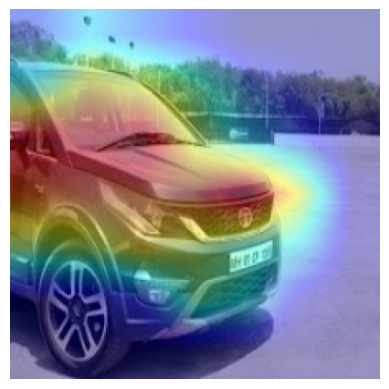

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# convert heatmap to numpy if needed
if hasattr(heatmap, "numpy"):
    heatmap_vis = heatmap.numpy()
else:
    heatmap_vis = heatmap

heatmap_vis = cv2.resize(heatmap_vis, (224,224))
heatmap_vis = np.uint8(255 * heatmap_vis)
heatmap_color = cv2.applyColorMap(heatmap_vis, cv2.COLORMAP_JET)

original = cv2.imread(img_path)
original = cv2.resize(original, (224,224))

overlay = cv2.addWeighted(original, 0.6, heatmap_color, 0.4, 0)

plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,829 (8.63 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,564 (10.02 KB)

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Dateset_image_classification/Car_Bike_model.keras"
)


In [ ]:
# Backbone (MobileNetV2)
base_model = model.layers[0]   # mobilenetv2_1.00_224

# Classifier head
gap_layer = model.layers[1]
classifier = model.layers[2]

# Last conv layer
last_conv_layer = base_model.get_layer("Conv_1")


In [ ]:
def run_gradcam(img_path, img_size=(224,224)):

    # ---------- Load image ----------
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0   # same as training

    # ---------- Forward + Gradients ----------
    with tf.GradientTape() as tape:
        conv_outputs = base_model(img_array, training=False)
        tape.watch(conv_outputs)

        pooled = gap_layer(conv_outputs)
        preds = classifier(pooled)
        prob = preds[0][0]

        if prob > 0.5:
            # Dog image → Dog Grad-CAM
            loss = preds[:, 0]
            class_name = "Dog"
            confidence = prob * 100
        else:
            # Cat image → Cat Grad-CAM
            loss = 1 - preds[:, 0]
            class_name = "Cat"
            confidence = (1 - prob) * 100


    # ---------- Gradients ----------
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    # ---------- Grad-CAM heatmap ----------
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) + 1e-8
    heatmap = heatmap.numpy()

    # ---------- Resize heatmap ----------
    heatmap_resized = cv2.resize(heatmap, img_size)

    # ---------- Grayscale Grad-CAM ----------
    heap_map = np.uint8(255 * heatmap_resized)

    # ---------- Colored Heatmap ----------
    heat_map_color = cv2.applyColorMap(heap_map, cv2.COLORMAP_JET)

    # ---------- Original image ----------
    original = cv2.imread(img_path)
    original = cv2.resize(original, img_size)

    # ---------- Overlays ----------
    overlay_gray = cv2.addWeighted(
        cv2.cvtColor(original, cv2.COLOR_BGR2GRAY),
        0.6,
        heap_map,
        0.4,
        0
    )

    overlay_color = cv2.addWeighted(
        original,
        0.6,
        heat_map_color,
        0.4,
        0
    )

    # ---------- Prediction label ----------
    prob = preds[0][0].numpy()
    if prob > 0.5:
        label = "Dog"
        confidence = prob * 100
    else:
        label = "Cat"
        confidence = (1 - prob) * 100

    # ---------- Visualization ----------
    plt.figure(figsize=(16,8))

    plt.subplot(2,3,1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2,3,2)
    plt.imshow(heap_map, cmap="gray")
    plt.title("Grad-CAM (Grayscale)")
    plt.axis("off")

    plt.subplot(2,3,3)
    plt.imshow(cv2.cvtColor(heat_map_color, cv2.COLOR_BGR2RGB))
    plt.title("Heat Map (Colored Grad-CAM)")
    plt.axis("off")

    plt.subplot(2,3,5)
    plt.imshow(overlay_gray, cmap="gray")
    plt.title("Image + Grayscale Grad-CAM")
    plt.axis("off")

    plt.subplot(2,3,6)
    plt.imshow(cv2.cvtColor(overlay_color, cv2.COLOR_BGR2RGB))
    plt.title("Image + Heat Map Overlay")
    plt.axis("off")

    plt.suptitle(
        f"Prediction: {label} | Confidence: {confidence:.2f}%",
        fontsize=14,
        fontweight="bold"
    )

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


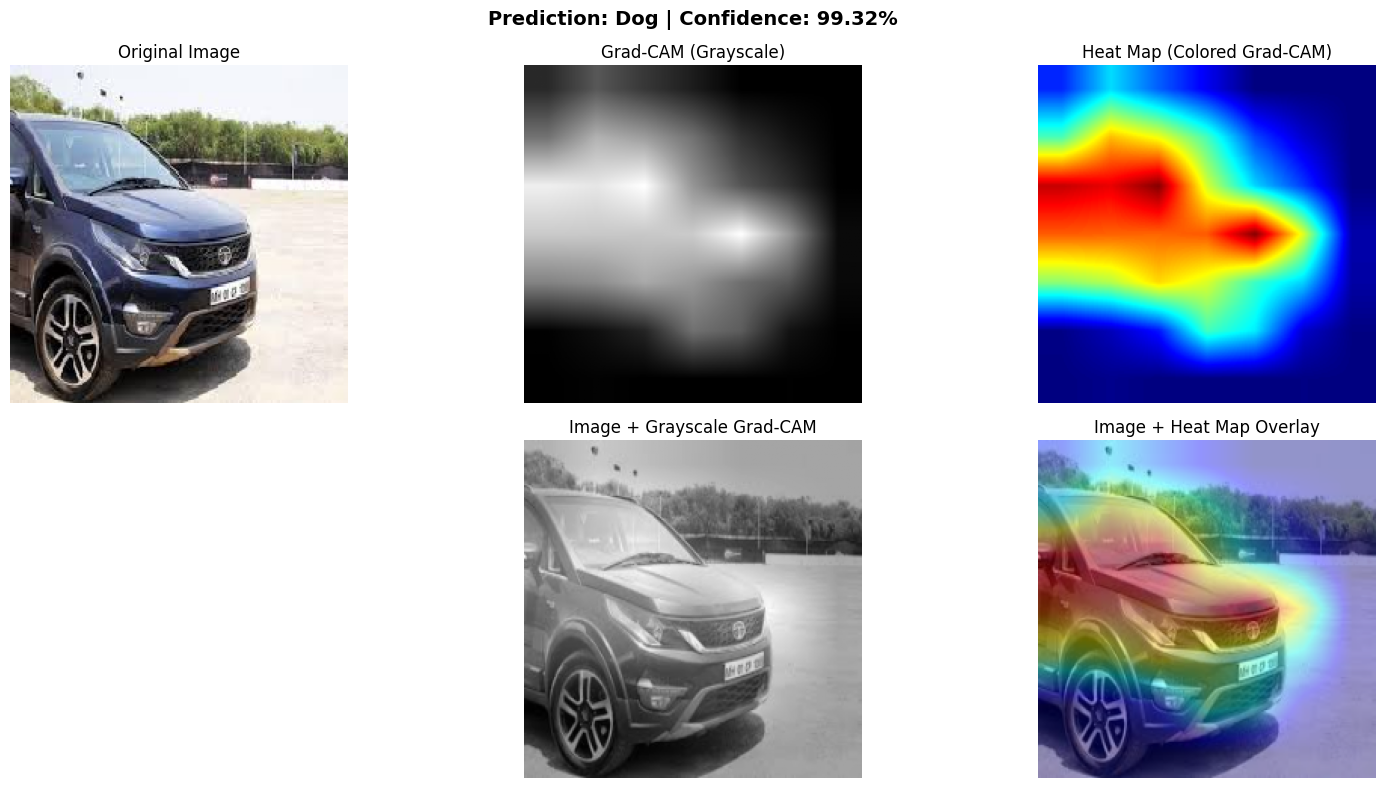

In [ ]:
run_gradcam(
    "/content/drive/MyDrive/Dateset_image_classification/Testing_Dataset/Car/Car (118).jpeg"
)
